# K-Means clustering

**Various types of clustering:**
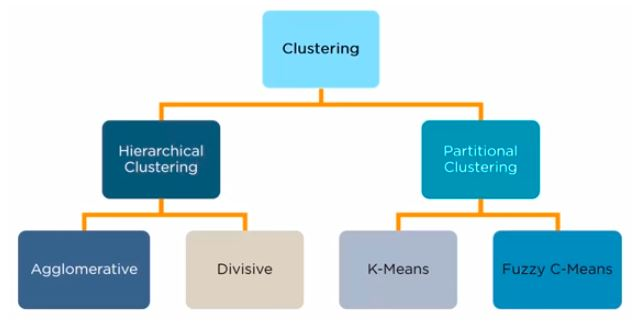

**K-means clustering** is one of the simplest and popular ***unsupervised machine learning*** algorithms.

The objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.

A cluster refers to a collection of data points aggregated together because of certain similarities.

You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.

Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.

In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:

-  The centroids have stabilized — there is no change in their values because the clustering has been successful.
-  The defined number of iterations has been achieved.

**How do we choose the value for K?**

There is a way called the ***elbow method***. In this method, we choose a different number of clusters and start plotting the within-cluster distance to the centroid. The graph looks as below.
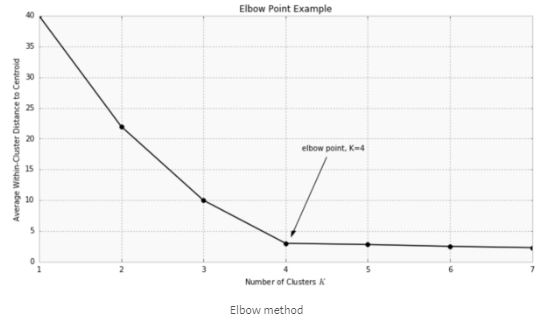
From the above graph we can infer that at k=4, the graph reaches an optimum minimum value. Even though the within-cluster distance decreases after 4, we would be doing more computations. Which is just analogous to the law of diminishing returns. Therefore, we choose a value of 4 as the optimum number of clusters. The reason it is named the elbow method is that the optimum number of clusters would represent an elbow joint.

### Distance Measure
Distance measure will determine the similarity between two elements and it will influence the shape of the clusters

***Euclidean distance measure***
- Comparing the shortest distance among two objects. It uses Pythagorean Theorem. 
- It can be used to calculate the distance between two data points in a plane.
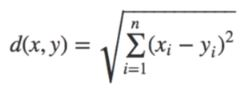

***Manhattan distance measure***
- We use Manhattan Distance if we need to calculate the distance between two data points in a grid like path.
- Distance d will be calculated using an absolute sum of difference between its cartesian co-ordinates.
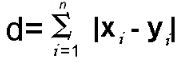

***Squared Euclidean distance measure***
- The Euclidean squared distance metric uses the same equation as the Euclidean distance metric, but does not take the square root

***Cosine distance measure***
- Used to find similarities between different documents. In cosine metric we measure the degree of angle between two documents/vectors

**The advantages of using K-Means:**

- Easy to implement
- Relatively fast and efficient
- Only has one parameter to tune and you can easily see the direct impact of adjusting the value of parameter K

**Applications of K-Means Clustering:**
- Behavioural Segmentation
- Anomaly Detection
- Social Network Analysis
- Market Segmentation

***Great soures:*** 
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
- https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a
- https://www.youtube.com/watch?v=Xvwt7y2jf5E&list=PLEiEAq2VkUULYYgj13YHUWmRePqiu8Ddy&index=24

### Example: Cars brand clustering 

In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# allows charts to appear in the notebook
%matplotlib inline

In [2]:
# importing the dataset
dataset = pd.read_csv('data/cars.csv')

In [3]:
X = dataset.iloc[:,:-1].values

In [4]:
X = pd.DataFrame(X)
X = dataset[dataset.columns[:-1]]
X = X.convert_objects(convert_numeric=True)
X.columns = ['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60', 'year']

C:\Users\Ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
# Eliminating null values
for i in X.columns:
    X[i] = X[i].fillna(int(X[i].mean()))
for i in X.columns:
    print(X[i].isnull().sum())

0
0
0
0
0
0
0


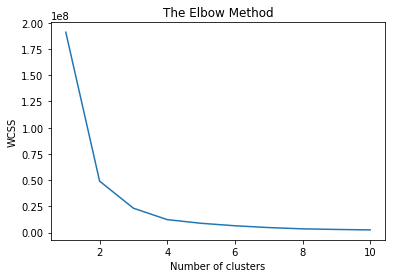

In [6]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans

wcss = []

# n_clusters=i -> how increasing the number of clusters changes our answer
# k-means++ -> optimizet setting for searching centroids
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter = 300, n_init=10, random_state=0)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_) 

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
#Appliying k-means to the cars dataset

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter = 300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
X = X.as_matrix(columns=None)

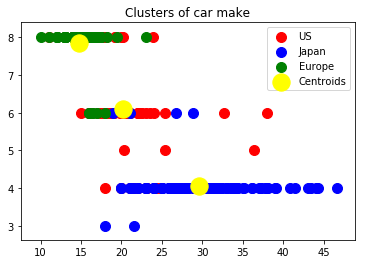

In [8]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='US')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Japan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Europe')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of car make')
plt.legend()
plt.show()


### Example: Walmart store locations

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

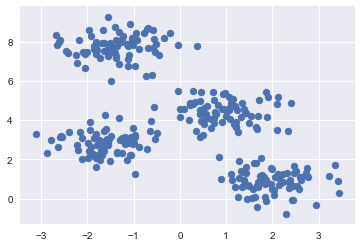

In [10]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_means = kmeans.predict(X)

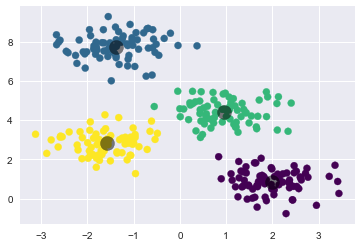

In [12]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=y_means, s=50, cmap="viridis")

plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)

### Example: Color compression

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


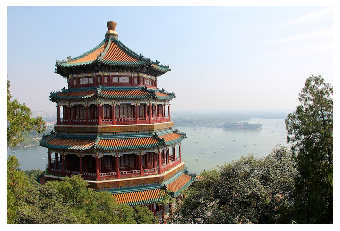

In [13]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [14]:
china.shape

(427, 640, 3)

In [15]:
data = china / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [16]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
        
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker=".")
    ax[0].set(xlabel="Red", ylabel="Green", xlim=(0,1), ylim=(0,1))
    
    ax[1].scatter(R, B, color=colors, marker=".")
    ax[1].set(xlabel="Red", ylabel="Blue", xlim=(0,1), ylim=(0,1))
    
    fig.suptitle(title, size=20)

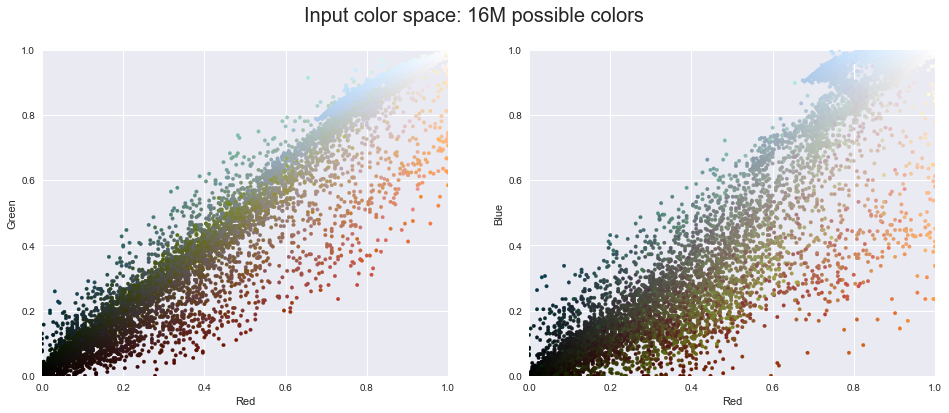

In [17]:
plot_pixels(data, title="Input color space: 16M possible colors")

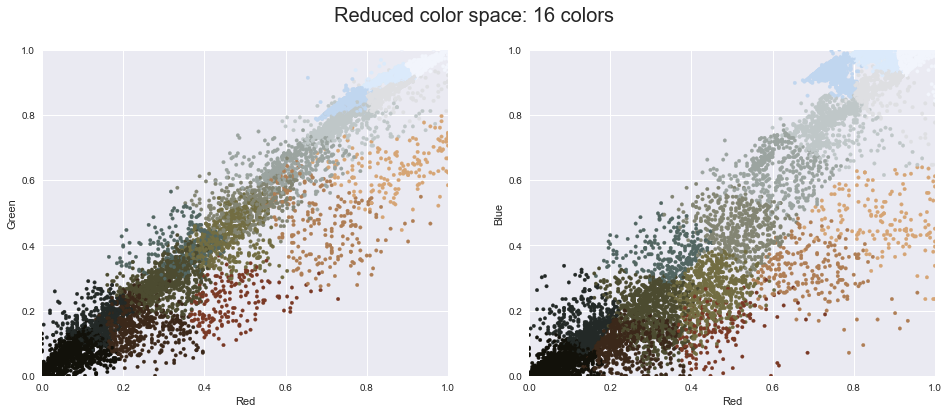

In [18]:
import warnings; warnings.simplefilter("ignore")

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

Text(0.5,1,'16-Color Image')

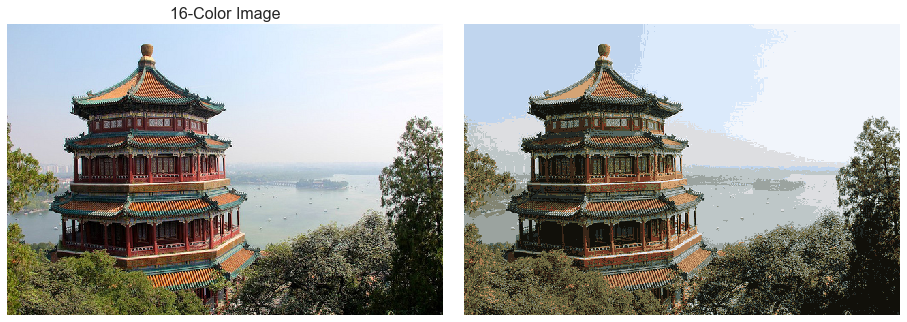

In [19]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
plt.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("Original Image", size=16)
ax[1].imshow(china_recolored)
ax[0].set_title("16-Color Image", size=16)